In [1]:
# -*- coding: utf-8 -*-
"""
TA Workshop: Text Preparation (DTM)
"""
import nltk
from nltk import FreqDist, SnowballStemmer
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anirban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anirban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
nltk.download('reuters')
from nltk.corpus import reuters

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\anirban\AppData\Roaming\nltk_data...


In [3]:
!unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# We'll use the reuters corpus in NLTK.
# The same steps of preprocessing can be done on documents read in from external files.

# How many files are there in the corpus?
# What are their categories? Single or multiple categories for one file?
print("No. of documents: ", len(nltk.corpus.reuters.fileids()))
cats = [ reuters.categories(f) for f in reuters.fileids() ]
cat_num = [ len(c) for c in cats ]
fd_num = FreqDist(cat_num)
fd_num.plot()

No. of documents:  10788



Bad key "text.kerning_factor" on line 4 in
C:\anaconda\envs\anirban\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


<Figure size 640x480 with 1 Axes>

In [5]:
# Most files have single category, but some do have two or more categories.
fd_num

FreqDist({1: 9160, 2: 1173, 3: 255, 4: 91, 5: 52, 6: 27, 7: 9, 8: 7, 9: 5, 10: 3, ...})

In [6]:
# How many documents are there in each category?
# FreqDist() can be used to find the answer, but we need to flatten the list of categories first.
cats_flat = [ c for l in cats for c in l ]
fd_cat = FreqDist(cats_flat)
# how many categories in total
print (len(fd_cat))
print(fd_cat.most_common())

90
[('earn', 3964), ('acq', 2369), ('money-fx', 717), ('grain', 582), ('crude', 578), ('trade', 485), ('interest', 478), ('ship', 286), ('wheat', 283), ('corn', 237), ('dlr', 175), ('money-supply', 174), ('oilseed', 171), ('sugar', 162), ('coffee', 139), ('gnp', 136), ('veg-oil', 124), ('gold', 124), ('soybean', 111), ('nat-gas', 105), ('bop', 105), ('livestock', 99), ('cpi', 97), ('cocoa', 73), ('reserves', 73), ('carcass', 68), ('jobs', 67), ('copper', 65), ('rice', 59), ('yen', 59), ('cotton', 59), ('alum', 58), ('gas', 54), ('iron-steel', 54), ('ipi', 53), ('barley', 51), ('rubber', 49), ('meal-feed', 49), ('palm-oil', 40), ('zinc', 34), ('sorghum', 34), ('pet-chem', 32), ('tin', 30), ('lead', 29), ('silver', 29), ('wpi', 29), ('rapeseed', 27), ('strategic-metal', 27), ('orange', 27), ('soy-meal', 26), ('soy-oil', 25), ('retail', 25), ('fuel', 23), ('hog', 22), ('housing', 20), ('heat', 19), ('lumber', 16), ('sunseed', 16), ('income', 16), ('lei', 15), ('oat', 14), ('dmk', 14), ('t

In [7]:
# Let's pick two categories
grain = reuters.fileids('grain')
trade = reuters.fileids('trade')

print(len(grain))
print(len(trade))

grain_raw = [ reuters.raw(f) for f in grain ] 
trade_raw = [ reuters.raw(f) for f in trade ] 

582
485


In [8]:
# Let's explore the data by visualizing the articles in each category using word cloud
# For convenience, let's define a function myPrep() to perform the preprocessing steps given a file (text string):
#   tokenization, case lowering, punctuation removal, stopword removal, numeric removal
#   stemming/lemmatization
stop = stopwords.words('english')+['would', 'could']
snowball = SnowballStemmer('english')

def myPrep(tt):
    toks = nltk.word_tokenize(tt.lower())
    toks = [ t for t in toks if t not in string.punctuation+"’“”" ]
    toks = [ t for t in toks if t not in stop ]
    toks = [ t for t in toks if not t.isnumeric() ]
    toks = [ snowball.stem(t) for t in toks ]
    return toks

In [9]:
print(myPrep("This is a test sentence."))
print(myPrep(trade_raw[0]))

['test', 'sentenc']
['asian', 'export', 'fear', 'damag', 'u.s.-japan', 'rift', 'mount', 'trade', 'friction', 'u.s.', 'japan', 'rais', 'fear', 'among', 'mani', 'asia', "'s", 'export', 'nation', 'row', 'inflict', 'far-reach', 'econom', 'damag', 'businessmen', 'offici', 'said', 'told', 'reuter', 'correspond', 'asian', 'capit', 'u.s.', 'move', 'japan', 'might', 'boost', 'protectionist', 'sentiment', 'u.s.', 'lead', 'curb', 'american', 'import', 'product', 'export', 'said', 'conflict', 'hurt', 'long-run', 'short-term', 'tokyo', "'s", 'loss', 'might', 'gain', 'u.s.', 'said', 'impos', 'mln', 'dlrs', 'tariff', 'import', 'japanes', 'electron', 'good', 'april', 'retali', 'japan', "'s", 'alleg', 'failur', 'stick', 'pact', 'sell', 'semiconductor', 'world', 'market', 'cost', 'unoffici', 'japanes', 'estim', 'put', 'impact', 'tariff', 'billion', 'dlrs', 'spokesmen', 'major', 'electron', 'firm', 'said', 'virtual', 'halt', 'export', 'product', 'hit', 'new', 'tax', '``', "n't", 'abl', 'busi', "''", 'sai

In [10]:
# Preprocess each file in each category
grain_clean = [ myPrep(f) for f in grain_raw ]
trade_clean = [ myPrep(f) for f in trade_raw ]

# Flatten the list of lists for FreqDist; break the docs
grain_flat = [ c for l in grain_clean for c in l ]
trade_flat = [ c for l in trade_clean for c in l ]

fd_grain = FreqDist(grain_flat)
fd_trade = FreqDist(trade_flat)

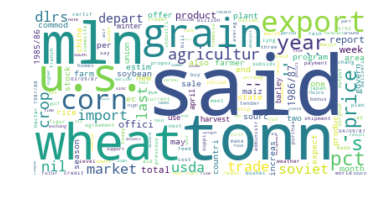

In [11]:
# Generate word clouds for the two categories.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_grain = WordCloud(background_color="white").generate_from_frequencies(fd_grain)
plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
plt.show()

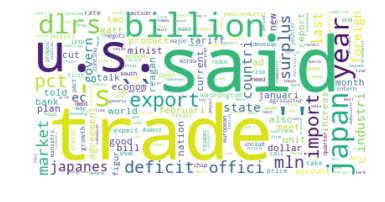

In [12]:
wc_trade = WordCloud(background_color="white").generate_from_frequencies(fd_trade)
plt.imshow(wc_trade, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# Finally, how to generate TDM

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



In [14]:
# Create a matrix using term frequency first using CountVectorizer
# It requires the input to be text string
# The result is in sparse matrix format
vec_tf = CountVectorizer()
grain_tf = vec_tf.fit_transform(grain_raw)
grain_tf

<582x7063 sparse matrix of type '<class 'numpy.int64'>'
	with 53617 stored elements in Compressed Sparse Row format>

In [15]:
# Where are the columns then?
vec_tf.get_feature_names()[1000:1050]

['alleviated',
 'allocated',
 'allocations',
 'allow',
 'allowable',
 'allowances',
 'allowed',
 'allowing',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'alter',
 'alterations',
 'alternating',
 'alternative',
 'alternatively',
 'alternatives',
 'although',
 'alvaro',
 'alvear',
 'always',
 'amalgamation',
 'amarillo',
 'amarlo',
 'amend',
 'amended',
 'amending',
 'amendment',
 'amendments',
 'america',
 'american',
 'amid',
 'among',
 'amount',
 'amounted',
 'amounts',
 'ample',
 'amsol',
 'amstutz',
 'amtorg',
 'an',
 'analyses',
 'analysis',
 'analyst',
 'analysts',
 'ancestors',
 'anchorage']

In [16]:
# index of a specific word
vec_tf.vocabulary_["grain"]

3237

In [17]:
# you can set a minimum DF and maximum DF
vec_tf_2 = CountVectorizer(min_df = 2, max_df=0.7)
grain_tf_2 = vec_tf_2.fit_transform(grain_raw)
grain_tf_2

<582x3974 sparse matrix of type '<class 'numpy.int64'>'
	with 47283 stored elements in Compressed Sparse Row format>

In [18]:
# and activate stopword removal
vec_tf_3 = CountVectorizer(min_df = 2, max_df=0.7, stop_words='english')
grain_tf_3 = vec_tf_3.fit_transform(grain_raw)
grain_tf_3

<582x3749 sparse matrix of type '<class 'numpy.int64'>'
	with 35885 stored elements in Compressed Sparse Row format>

In [19]:
# To have binary indexing, set "binary=True"
vec_bin = CountVectorizer(binary=True, min_df = 2, max_df=0.7, stop_words='english')
grain_bin = vec_bin.fit_transform(grain_raw)
grain_bin.toarray()[:10, :20] 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [20]:
# And tfidf indexing
vec_tfidf = TfidfVectorizer(min_df = 2, max_df=0.7, stop_words='english')
grain_tfidf = vec_tfidf.fit_transform(grain_raw)
grain_tfidf
grain_tfidf.toarray()[:10, :20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [21]:
# Can we control the preprocessing more precisely? Yes.
# Recall that we've created the function myPrep()? We can use it with the vectorizer
myVec = TfidfVectorizer(tokenizer=myPrep, min_df = 2, max_df=0.7)
grain_v = myVec.fit_transform(grain_raw)
grain_v

<582x3133 sparse matrix of type '<class 'numpy.float64'>'
	with 34897 stored elements in Compressed Sparse Row format>

In [22]:
# To save the vectorized results for future use
# You can find the files in the Colab session, which can be downloaded to 
# your local machine to keep.
import pickle
pickle.dump(grain_tfidf, open("grain-tfidf.pkl", "wb"))
pickle.dump(vec_tfidf.vocabulary_, open("grain-feature.pkl","wb"))

In [23]:
#load the content
loaded_vec = TfidfVectorizer(decode_error="replace",vocabulary=pickle.load(open("grain-feature.pkl", "rb")))
tfidf = pickle.load(open("grain-tfidf.pkl", "rb" ) )
tfidf

<582x3749 sparse matrix of type '<class 'numpy.float64'>'
	with 35885 stored elements in Compressed Sparse Row format>